# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

Original feature dimensions: 64
Reduced feature dimensions: 13

Training SVM with linear kernel
Best parameters for linear kernel: {'C': 0.30218397440325717, 'degree': 3, 'gamma': 'scale'}

Training SVM with rbf kernel
Best parameters for rbf kernel: {'C': 8.389400292173631, 'degree': 3, 'gamma': 0.014695476192547066}

Training SVM with poly kernel
Best parameters for poly kernel: {'C': 5.588135039273247, 'degree': 3, 'gamma': 0.8542657485810173}

Evaluating SVM with linear kernel
Accuracy: 0.9556

Evaluating SVM with rbf kernel
Accuracy: 0.9204

Evaluating SVM with poly kernel
Accuracy: 0.9833


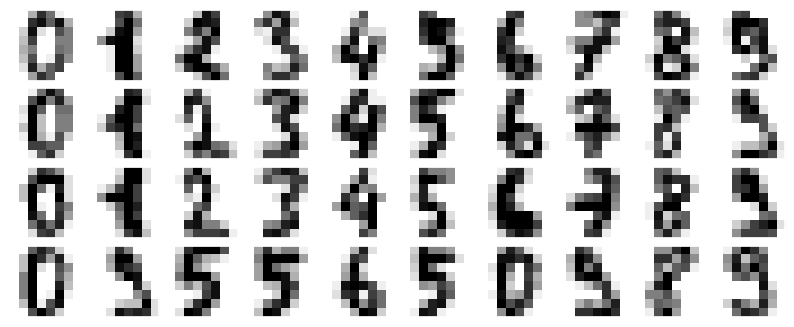

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

# Step 1: Prepare the data
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 2: Reduce dimensionality using PCA
pca = PCA(n_components=0.8, random_state=0)  # Retain 80% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original feature dimensions: {X.shape[1]}")
print(f"Reduced feature dimensions: {X_train_pca.shape[1]}")

# Step 3 & 4: Train SVM models with hyperparameter tuning
kernels = ['linear', 'rbf', 'poly']
best_models = {}
for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel")
    
    # Define parameter grid
    param_grid = {
        'C': stats.uniform(0.1, 10),  # Regularization parameter
        'gamma': stats.uniform(0.01, 1) if kernel != 'linear' else ['scale'],  # Only for RBF and poly
        'degree': stats.randint(2, 5) if kernel == 'poly' else [3]  # Only for poly
    }
    
    # Set up the SVM model
    svc = SVC(kernel=kernel, random_state=42)
    search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=0) # Has the 5-Cross-Fold Validation
    
    # Fit the model
    search.fit(X_train_pca, y_train)
    best_models[kernel] = search.best_estimator_
    
    print(f"Best parameters for {kernel} kernel: {search.best_params_}")

# Step 5: Compare model performances
for kernel, model in best_models.items():
    print(f"\nEvaluating SVM with {kernel} kernel")
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))


In [39]:
# Step 5: Compare model performances
from sklearn.model_selection import cross_val_score
for kernel, model in best_models.items():
    print(f"\nEvaluating SVM with {kernel} kernel")
    scores = cross_val_score(model, X_test_pca, y_test, cv=5)
    tot_score = 0
    for score in scores:
        tot_score += score
    tot_score = tot_score/len(scores)
    print(f"{tot_score:.4f}")


Evaluating SVM with linear kernel
0.9315

Evaluating SVM with rbf kernel
0.7148

Evaluating SVM with poly kernel
0.9574


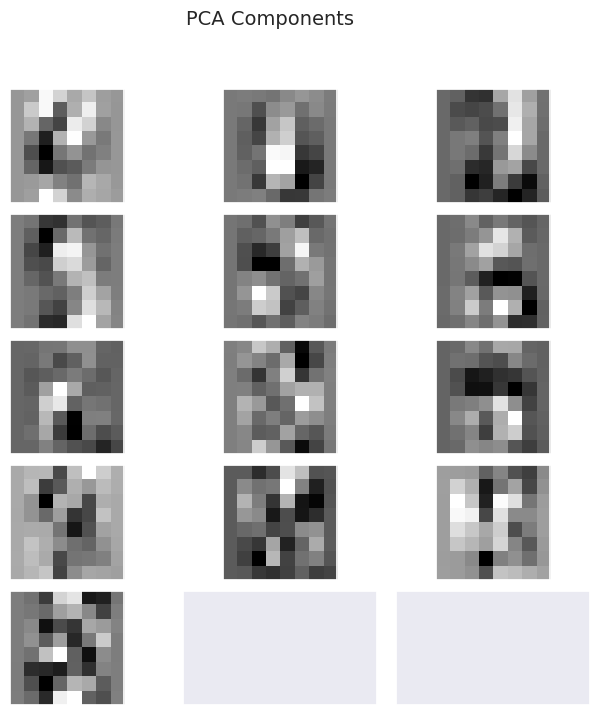

In [40]:
#JUST FOR FUN!

pca = PCA(n_components=.8, random_state=0)
pca.fit(X_train)

# Plot the principal components
def plot_pca_components(components, title="PCA Components"):
    fig, axes = plt.subplots(5, 3, figsize=(8, 8),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        if i == 13:
            break
        ax.imshow(components[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest')
    fig.suptitle(title, fontsize=14)
    plt.show()

# Plot them (kinda just stole the function from previous cell and modified a little bit)

plot_pca_components(pca.components_)

#JUST FOR FUN! - Jason :)